# US National Obesity Rate in 2014 (state by state)

- This notebook will explore the obesity rates state by state
- First, the notebook will calculate the national obesity rate 
- Second, the notebook will calculate the  national obesity rate for every state 
- Third, the notebook will show a graph comparing the obesity rates state by state
- The purpose of this notebook is to show what state has the highest and lowest obesity rate

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
import seaborn as sns
import numpy as np

### Note: This notebook will use the gender data frame as it provides us with the obesity rates of the entire population (male and female)

# Import and Explore Obesity by Gender Data Frame

In [2]:
obesity_in_US_gender_2014 = pd.read_csv('../data/Clean Data/obesity_in_US_gender_2014.csv')

In [3]:
obesity_in_US_gender_2014

,Unnamed: 0,year,state,state_name,gender_pc,Data_Value_Alt,Question,Sample_Size,Total,Gender,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,0,2014,AL,Alabama,32.9,32.9,Percent of adults aged 18 years and older who ...,5156.0,NaN,Female,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
1,1,2014,AL,Alabama,34.1,34.1,Percent of adults aged 18 years and older who ...,3034.0,NaN,Male,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
2,2,2014,AL,Alabama,37.2,37.2,Percent of adults aged 18 years and older who ...,3034.0,NaN,Male,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
3,3,2014,AL,Alabama,29.8,29.8,Percent of adults aged 18 years and older who ...,5156.0,NaN,Female,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
4,4,2014,AK,Alaska,29.3,29.3,Percent of adults aged 18 years and older who ...,1921.0,NaN,Male,"(64.84507995700051, -147.72205903599973)",2,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,2014,WI,Wisconsin,29.6,29.6,Percent of adults aged 18 years and older who ...,3573.0,NaN,Female,"(44.39319117400049, -89.81637074199966)",55,Gender,Female
212,212,2014,WY,Wyoming,29.7,29.7,Percent of adults aged 18 years and older who ...,2490.0,NaN,Male,"(43.23554134300048, -108.10983035299967)",56,Gender,Male
213,213,2014,WY,Wyoming,29.2,29.2,Percent of adults aged 18 years and older who ...,3483.0,NaN,Female,"(43.23554134300048, -108.10983035299967)",56,Gender,Female
214,214,2014,WY,Wyoming,41.7,41.7,Percent of adults aged 18 years and older who ...,2490.0,NaN,Male,"(43.23554134300048, -108.10983035299967)",56,Gender,Male


In [4]:
obesity_in_US_gender_2014['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
obesity_in_US_gender_2014['Gender'].value_counts()

Female    108
Male      108
Name: Gender, dtype: int64

# Questions: 

#### Question 1: What is the national obesity rate in 2014?
- Steps: 
    - make national its own data frame named "gender_obesity_in_US_national_2014_df"
    - create a filter "national_avg_2014" to find the mean obesity rate nationally

#### Question 2: What is the average US obesity rate by state in 2015?
- Steps: 
    - create a new data frame that only has US states named "obesity_in_US_gender_2014"
    - create a data frame named "obesity_in_2014_bystate_avg" on the 'obesity_in_US_gender_2014' data frame           to calculate the mean by state
    - use the region mean data to plot a bar chart and add labels

#### Question 3: What state has the highest obesity rate in 2015? What state has the lowest obesity rate in 2015?
- Steps:
    - calculate the mean of the gender_pc column grouping by state 
    - sort it in descending order and name the result "US_in_2014"
    - get the top 5 ranked states and name the result "top5_states"
    - get the bottom 5 ranked states and name the result "bottom5_states"



# Question 1: What is the national obesity rate in 2014?

In [6]:
#make national its own dataframe named "gender_obesity_in_US_national_2014_df"
gender_obesity_in_US_national_2014_df=obesity_in_US_gender_2014[(obesity_in_US_gender_2014['state_name']=='National')]
gender_obesity_in_US_national_2014_df

,Unnamed: 0,year,state,state_name,gender_pc,Data_Value_Alt,Question,Sample_Size,Total,Gender,GeoLocation,LocationID,StratificationCategory1,Stratification1
112,112,2014,US,National,29.0,29.0,Percent of adults aged 18 years and older who ...,183706.0,NaN,Male,NaN,59,Gender,Male
113,113,2014,US,National,28.8,28.8,Percent of adults aged 18 years and older who ...,242169.0,NaN,Female,NaN,59,Gender,Female
114,114,2014,US,National,41.1,41.1,Percent of adults aged 18 years and older who ...,183706.0,NaN,Male,NaN,59,Gender,Male
115,115,2014,US,National,29.2,29.2,Percent of adults aged 18 years and older who ...,242169.0,NaN,Female,NaN,59,Gender,Female


- "gender_obesity_in_US_national_2014_df"
    - this data frame represents the country as a whole 
    - use it to calculate national obesity rate as  a whole

In [7]:
gender_obesity_in_US_national_2014_df['Gender'].value_counts()

Female    2
Male      2
Name: Gender, dtype: int64

In [8]:
# Create a filter "national_avg_2014" to find the mean obesity rate nationally
national_avg_2014=gender_obesity_in_US_national_2014_df['gender_pc'].mean()
national_avg_2014


32.025

In [9]:
# Use "national_avg_2014" filter to show the national obesity rate average on chart
national_avg_2014=gender_obesity_in_US_national_2014_df.groupby('state_name')['gender_pc'].mean()
national_avg_2014
title1='The national obesity rate average in 2014'
print("{}\n{}".format(title1, '='*len(title1)))
print(national_avg_2014.sort_values())





The national obesity rate average in 2014
state_name
National    32.025
Name: gender_pc, dtype: float64


### Answer: The national obesity rate average in 2014 was 32.03%

Text(0.5, 1.0, '2014')

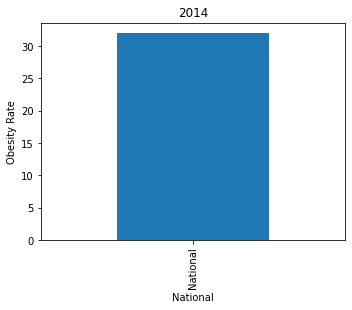

In [10]:

# 1. Set up the figure to plot two bar charts and specify size ratio (3:1)
plt.figure(figsize=(12,4))

# 2. the plt.subplot() function divides the main figure into rows and columns
#    121 = 1 row 2 columns and the first slot
plt.subplot(121)

# use the region mean data to plot a bar chart and add labels
national_avg_2014.plot(kind='bar')
plt.xlabel('National')
plt.ylabel('Obesity Rate')
plt.title('2014')


# **Create a new data frame that only has US states

In [11]:
# Create a data frame named "obesity_in_US_gender_2014" that excludes the rows 
# with the value "National", Guam", "Puerto Rico", "Virgin Islands" in the LocationDesc column
obesity_in_US_gender_2014=obesity_in_US_gender_2014[~(obesity_in_US_gender_2014['state_name']=='National')]
obesity_in_US_gender_2014=obesity_in_US_gender_2014[~(obesity_in_US_gender_2014['state_name']=='Guam')]
obesity_in_US_gender_2014=obesity_in_US_gender_2014[~(obesity_in_US_gender_2014['state_name']=='Puerto Rico')]
obesity_in_US_gender_2014=obesity_in_US_gender_2014[~(obesity_in_US_gender_2014['state_name']=='Virgin Islands')]
obesity_in_US_gender_2014['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'District of Columbia', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nevada', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

# Question 2: What is the average US obesity rate by state?

In [12]:
# create a data frame named "obesity_in_2014_bystate_avg" on the 'obesity_in_US_gender_2014' data frame to calculate the mean by state 
obesity_in_2014_bystate_avg = obesity_in_US_gender_2014.sort_values(['state_name'], ascending = [True])
obesity_in_2014_bystate_avg=obesity_in_2014_bystate_avg[['state','state_name','gender_pc','Gender']]
obesity_in_2014_bystate_avg = obesity_in_2014_bystate_avg.groupby('state_name')['gender_pc'].mean()
obesity_in_2014_bystate_avg



state_name
Alabama                 33.500
Alaska                  32.250
Arizona                 31.950
Arkansas                35.300
California              29.800
Colorado                28.575
Connecticut             30.200
Delaware                33.725
District of Columbia    27.500
Florida                 31.125
Georgia                 32.875
Hawaii                  28.925
Idaho                   32.800
Illinois                31.925
Indiana                 33.225
Iowa                    33.400
Kansas                  32.925
Kentucky                33.325
Louisiana               34.475
Maine                   32.225
Maryland                32.475
Massachusetts           29.450
Michigan                32.800
Minnesota               31.925
Mississippi             35.350
Missouri                32.750
Montana                 31.350
Nebraska                33.250
Nevada                  31.550
New Hampshire           31.725
New Jersey              31.550
New Mexico              32.4

Text(0.5, 1.0, 'US Obesity Rates by State in 2014')

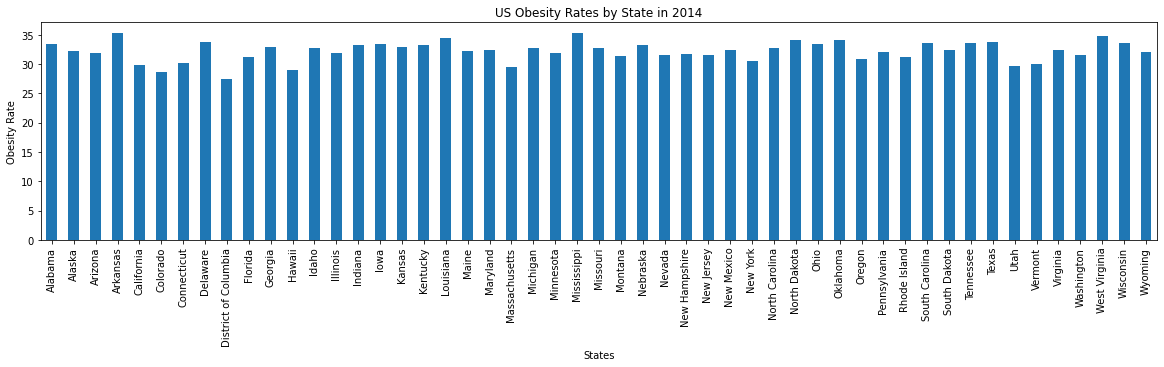

In [13]:
# 1. Set up the figure to plot bar chart
plt.figure(figsize=(20,4))
plt.subplot

# use the region mean data to plot a bar chart and add labels
obesity_in_2014_bystate_avg.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Obesity Rate')
plt.title('US Obesity Rates by State in 2014')

# Question 3: What state has the highest obesity rate? What state has the lowest obesity rate?

In [14]:
# 1. calculate the mean of the gender_pc column grouping by state 
#    sort it in descending order and name the result "US_in_2014"

# 2. get the top 5 ranked states and name the result "top5_states"

# 3. get the bottom 5 ranked states and name the result "bottom5_states"

US_in_2014=obesity_in_US_gender_2014.groupby('state_name')['gender_pc'].mean().sort_values(ascending=False)
top5_states = US_in_2014.head(5)
bottom5_states = US_in_2014.tail(5)



print("Measuring US obesity rates by state.\n")
print(f"The top 5 states are { ', '.join(top5_states.index)}")
print(f"The bottom 5 states are { ', '.join(bottom5_states.index)}")
US_in_2014.sort_values(ascending=False).to_frame()

Measuring US obesity rates by state.

The top 5 states are Mississippi, Arkansas, West Virginia, Louisiana, North Dakota
The bottom 5 states are Utah, Massachusetts, Hawaii, Colorado, District of Columbia


,gender_pc
state_name,
Mississippi,35.350
Arkansas,35.300
West Virginia,34.775
Louisiana,34.475
North Dakota,34.175
Oklahoma,34.100
Texas,33.850
Delaware,33.725
Wisconsin,33.650


### Mississippi had the highest US obesity rate in 2014 at 35.35% and Colorado has the lowest US obesity rate in 2014 at 27.5%

# Conclusion

## National Obesity Rate
- The national obesity rate average in 2014 was 32.03%
- Mississippi had the highest US obesity rate in 2014 at 35.35% and Colorado has the lowest US obesity rate in 2014 at 27.5%